# Plant Statistics

In [185]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import statsmodels.api as sm

In [186]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Column names

In [187]:
columns = [
    'Day/ Treatment',
    '0,0', '0,3', '0,6', '0,9',
    '0.25,0', '0.25,3', '0.25,6', '0.25,9',
    '0.5,0', '0.5,3', '0.5,6', '0.5,9',
    '0.75,0', '0.75,3', '0.75,6', '0.75,9'
]

In [188]:
def actual_number(val):
    return val != ' ' and \
        val != ',' and \
        val != ', '

In [189]:
def convert_to_df():
    with open('ScallionData.csv') as csvfile:
        plant_reader = csv.reader(csvfile)
        scallion_data = [[[height
                           for height in treatment.split(',')
                           if actual_number(height)]
                          for treatment in day
                          if actual_number(day)]
                         for day in plant_reader]
        return pd.DataFrame(scallion_data[1:], columns=columns)

In [190]:
def convert_to_np(scallion_data, treatment):
    scallion_X = np.array([2 * int(x[0])
                           for x in scallion_data['Day/ Treatment']
                           for _ in range(5)])
    
    scallion_y = np.array([[float(y)
                            for y in row]
                           for row in scallion_data[treatment]])
    scallion_y = np.reshape(scallion_y, -1)

    return scallion_X, scallion_y

In [191]:
def linear_model(X, y):
    """Builds a linear model and returns a statsmodels object"""
    results = sm.OLS(y, sm.add_constant(X)).fit()
    return results


def resids(X, y, model):
    """Returns a numpy array contatining residuals"""
    return np.array([y_coord - (X[index] * model.params[1] + model.params[0])
                     for index, y_coord in enumerate(y)])

In [192]:
def plot_data(scallion_X, scallion_y, treatment):
    fig = plt.gcf()
    fig.canvas.set_window_title('Plant Data')

    results = linear_model(scallion_X, scallion_y)
    X_plot = np.linspace(0, 12, 100)
    plt.plot(X_plot, X_plot * results.params[1] + results.params[0])

    plt.xlabel('Time (days)')
    plt.ylabel('Height (cm)')
    plt.title("{} Scallion Growth Rate".format(treatment))
    plt.legend()

    plt.scatter(scallion_X, scallion_y, label='height', color='k', s=25, marker='o')
    plt.show()

In [193]:
def plot_resids(X, y, treatment):
    fig = plt.gcf()
    fig.canvas.set_window_title('Plant Residuals')

    y = resids(X, y, linear_model(X, y))
    plt.xlabel('Time (days)')
    plt.ylabel('Residuals (cm)')
    plt.title("{} Scallion Growth Rate Residuals".format(treatment))
    plt.legend()

    plt.scatter(X, y, label='height', color='k', s=25, marker='o')
    plt.show()

In [194]:
def plot(X, y, treatment):
    plot_data(X, y, treatment)
    plot_resids(X, y, treatment)

In [195]:
scallion_data = convert_to_df()
print(scallion_data)

  Day/ Treatment                            0,0  \
0            [1]  [1.4,  1.4,  2.7,  1.1,  1.2]   
1            [2]    [1.5,  2,  2.7,  1.5,  1.2]   
2            [3]  [2.7,  1.5,  1.5,  2.3,  1.5]   
3            [4]  [3.2,  1.7,  1.5,  2.1,  2.6]   
4            [5]  [3.2,  2.6,  2.8,  1.5,  1.7]   
5            [6]  [3.2,  2.6,  2.8,  1.5,  1.7]   

                             0,3                            0,6  \
0  [1.2,  0.7,  0.7,  0.7,  0.6]  [1.0,  1.0,  0.9,  1.3,  0.8]   
1  [1.1,  0.7,  0.9,  0.7,  0.7]    [1,  1.3,  1.5,  1.1,  1.4]   
2  [0.9,  0.9,  1.1,  0.7,  1.1]  [1.5,  1.5,  1.7,  1.3,  1.4]   
3  [1.0,  1.1,  1.8,  1.2,  0.8]    [2,  1.1,  1.2,  1.7,  1.3]   
4  [0.9,  2.1,  2.4,  0.9,  1.3]    [1.7,  1.3,  1.2,  1.1,  2]   
5  [0.9,  2.1,  2.4,  0.9,  1.3]    [1.7,  1.3,  1.2,  1.1,  2]   

                             0,9                       0.25,0  \
0  [1.0,  1.1,  0.8,  0.9,  1.1]  [0.7,  1.0,  0.9,  1,  1.1]   
1    [1.5,  1,  1.3,  1.6,  0.9]    [0.7, 

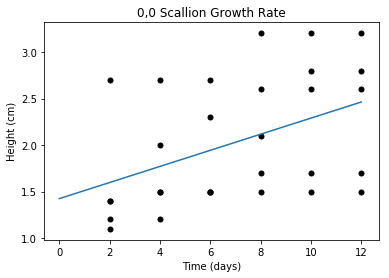

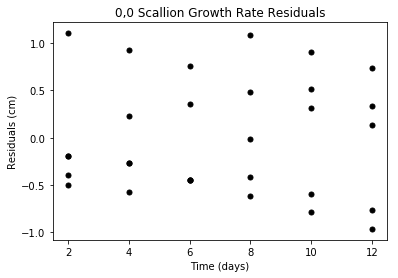

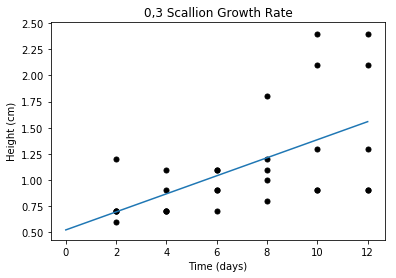

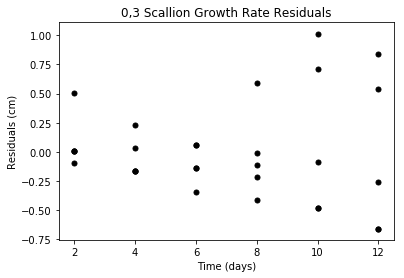

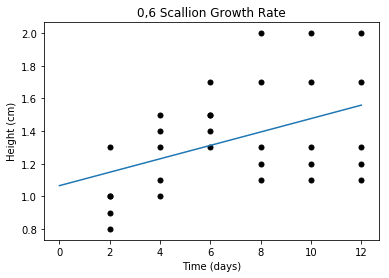

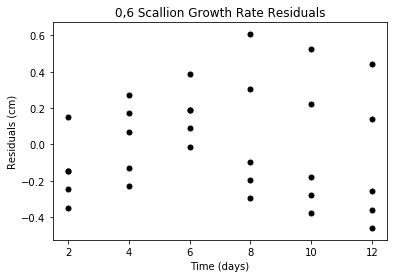

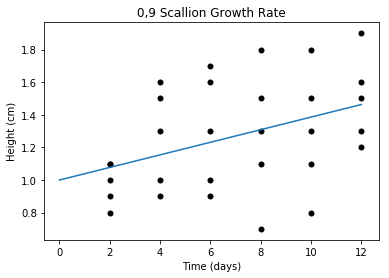

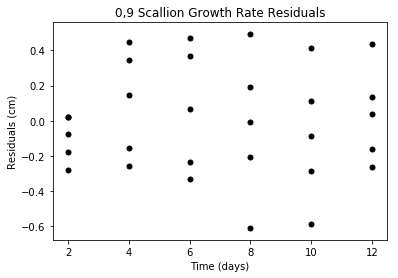

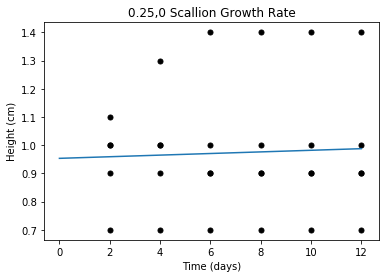

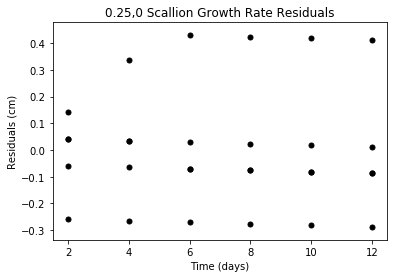

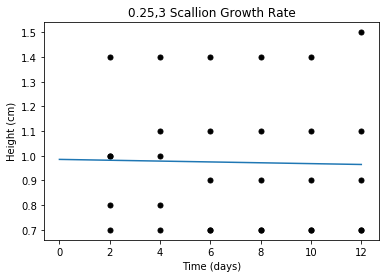

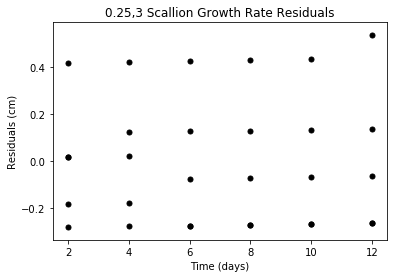

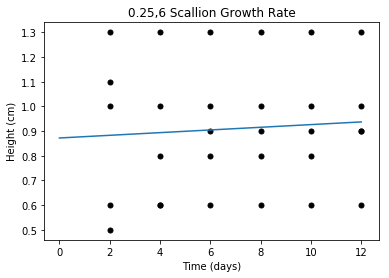

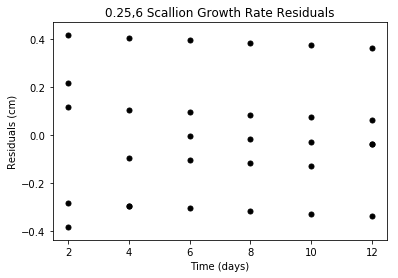

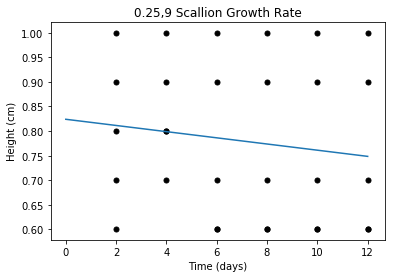

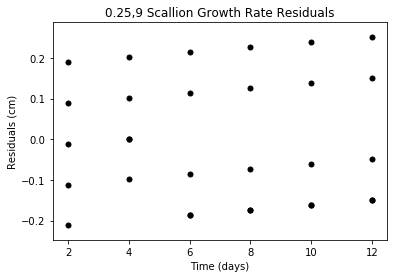

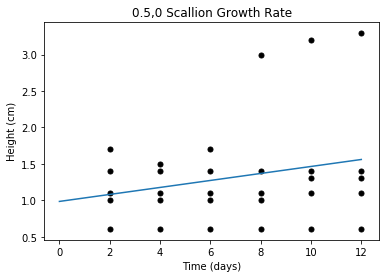

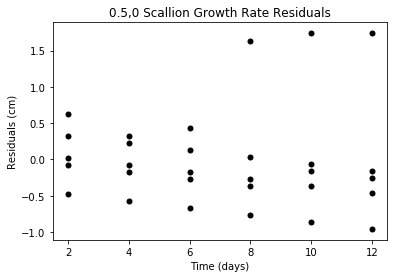

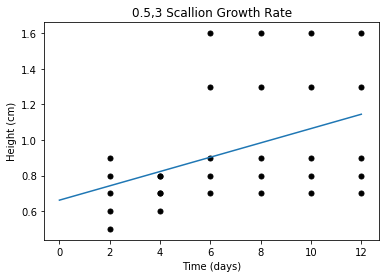

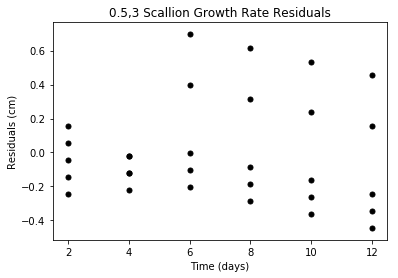

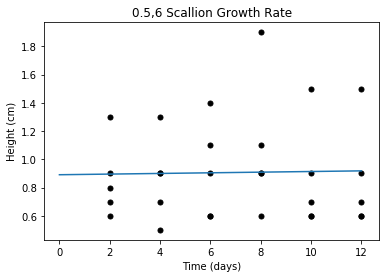

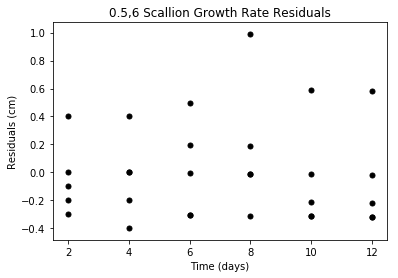

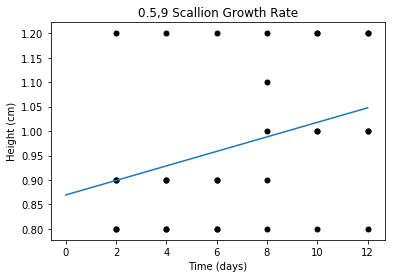

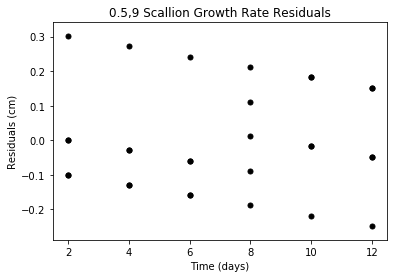

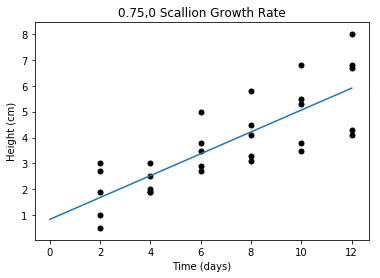

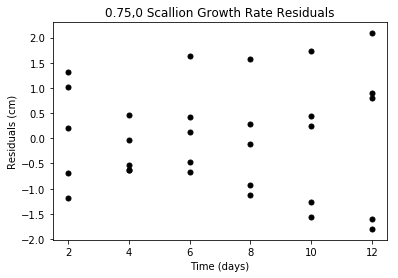

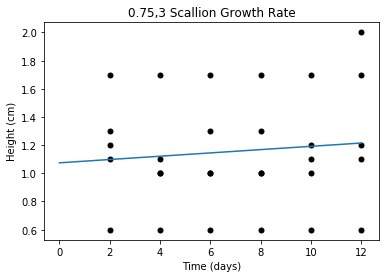

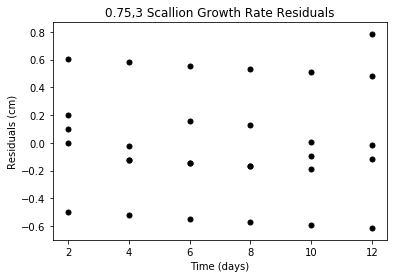

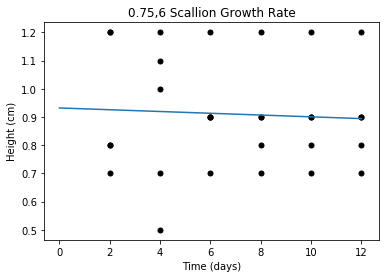

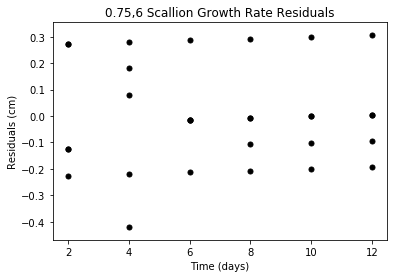

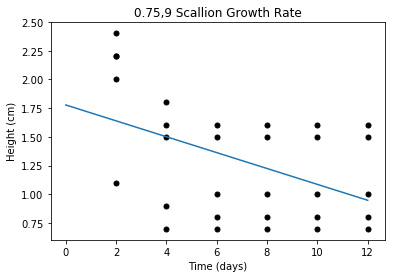

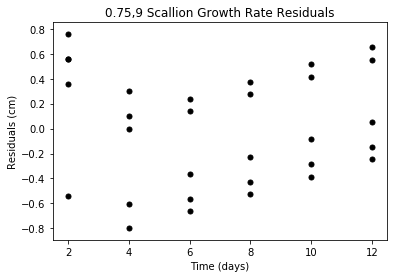

In [200]:
for treatment in columns[1:]:

    X, y = convert_to_np(scallion_data, treatment)
    plot(X, y, treatment)